In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [66]:
batch_sizes = [64, 128, 256, 512]

dfs = {}
for size in batch_sizes:
    dfs[size] = pd.read_csv(f'./gradient_confusion_results_ResNet44_CIFAR10_batch_size_{size}.csv')

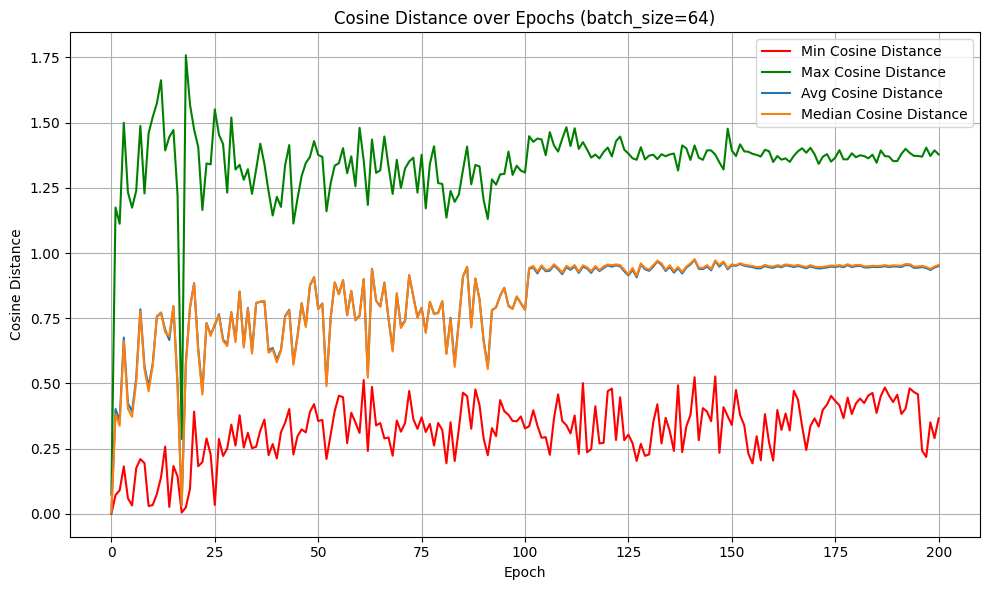

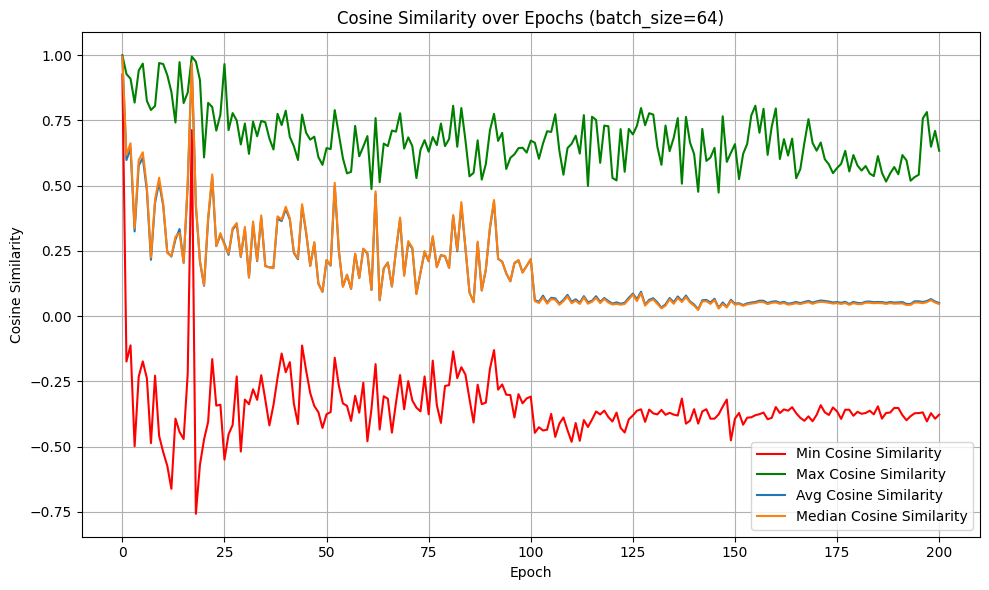

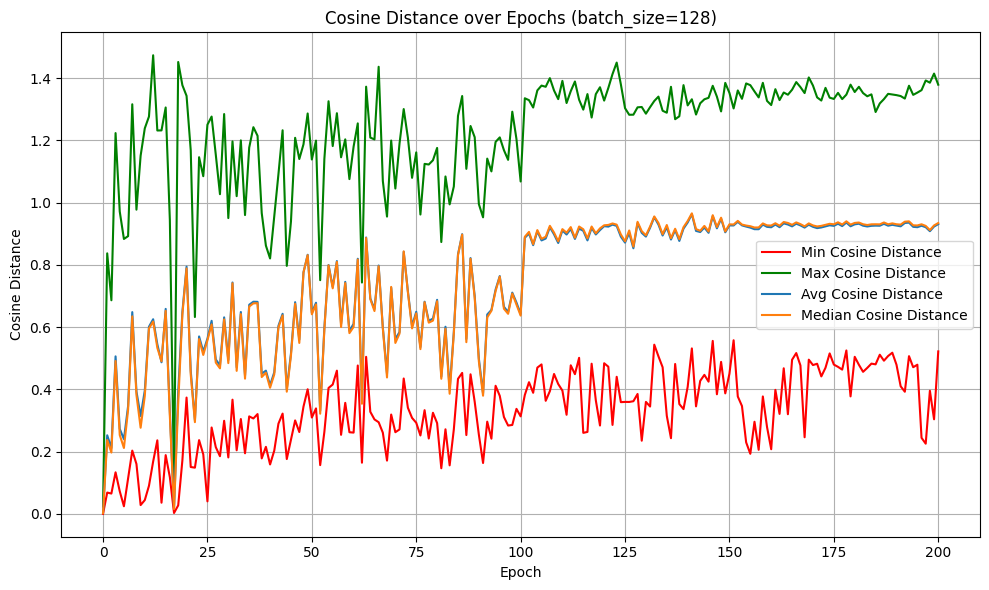

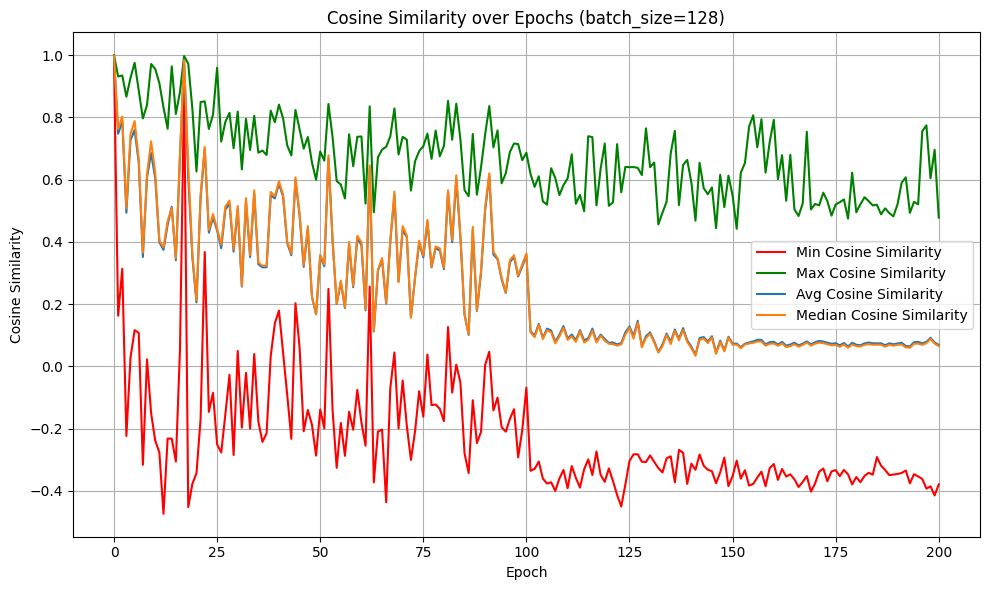

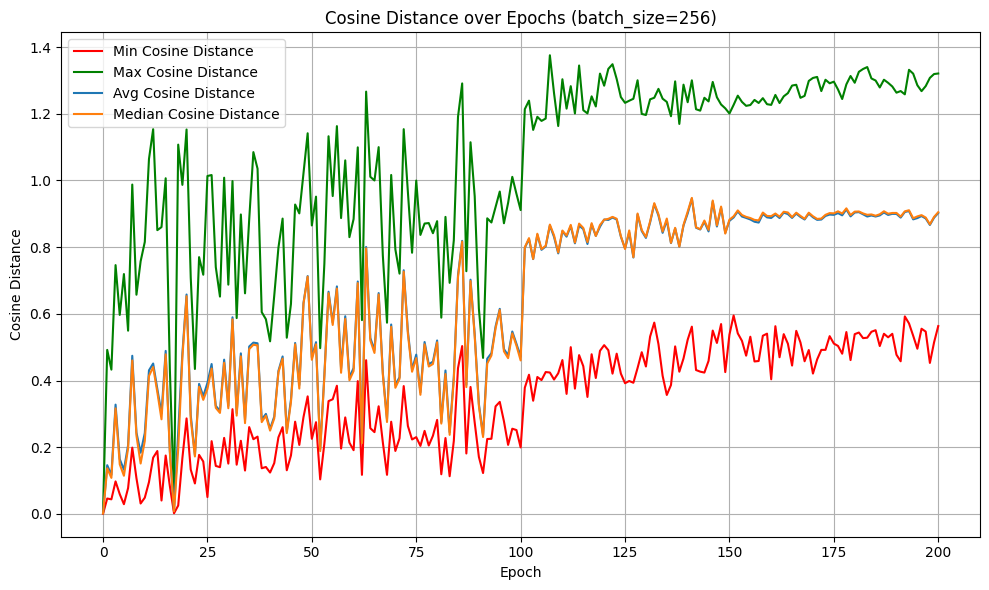

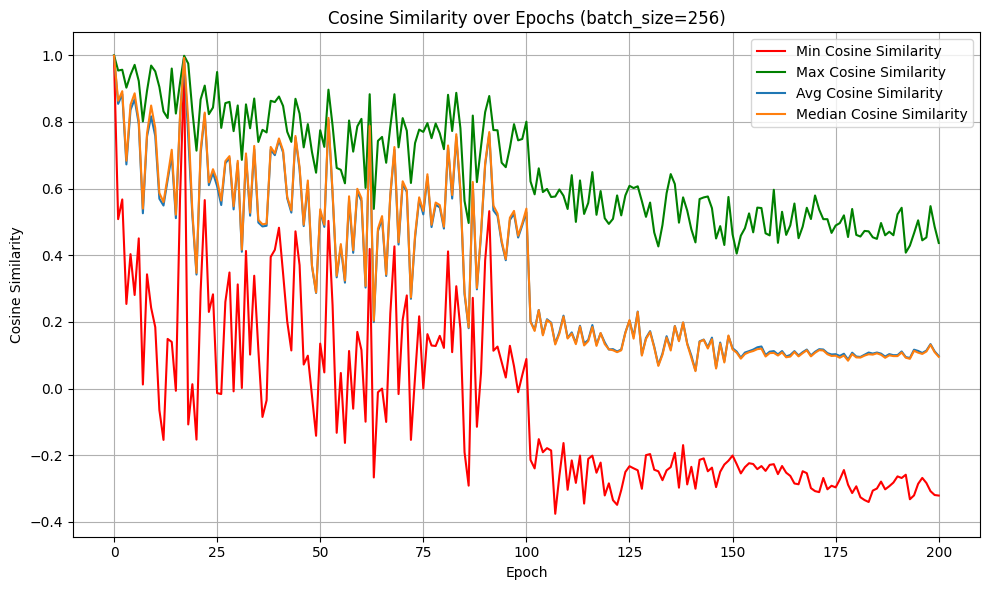

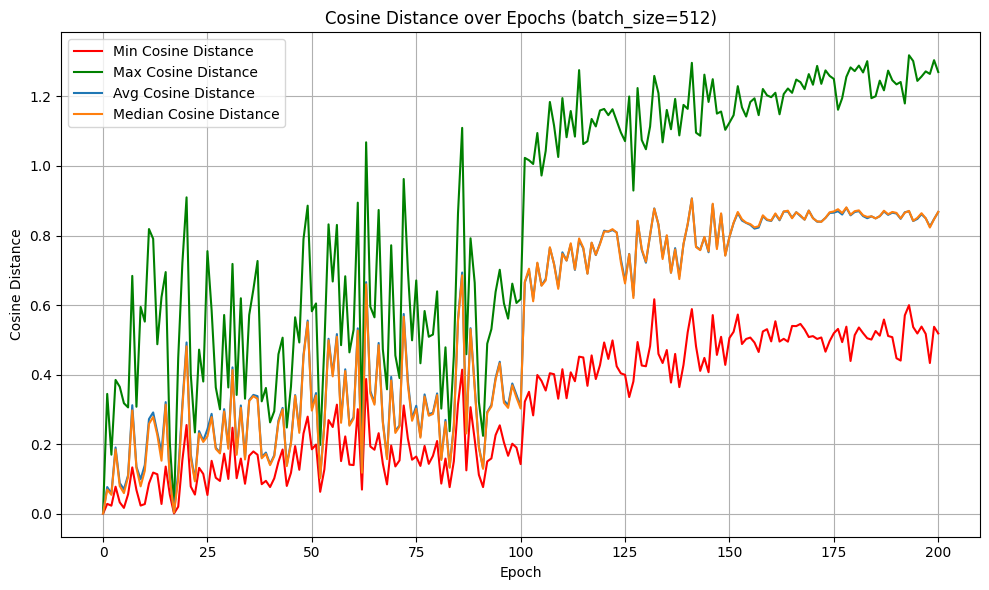

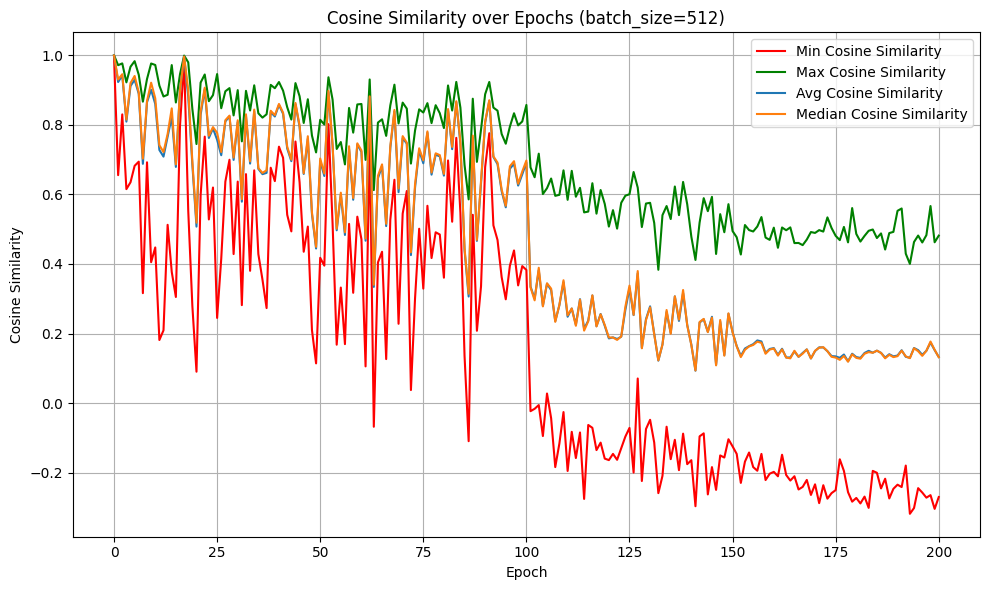

In [67]:
for size in batch_sizes:
    # Plotting the cosine distances
    plt.figure(figsize=(10, 6))
    plt.plot(dfs[size]['epoch'], dfs[size]['min_cosine_distance'], label='Min Cosine Distance', color='red')
    plt.plot(dfs[size]['epoch'], dfs[size]['max_cosine_distance'], label='Max Cosine Distance', color='green')
    plt.plot(dfs[size]['epoch'], dfs[size]['avg_cosine_distance'], label='Avg Cosine Distance')
    plt.plot(dfs[size]['epoch'], dfs[size]['median_cosine_distance'], label='Median Cosine Distance')

    # Adding labels and title
    plt.xlabel('Epoch')
    plt.ylabel('Cosine Distance')
    plt.title(f'Cosine Distance over Epochs (batch_size={size})')

    # Displaying the legend
    plt.legend()

    # Apply tight layout
    plt.tight_layout()
    plt.grid(True)
    plt.savefig(f'./figures/gc_cos_dist_{size}.pdf')
    plt.show()

    # Plotting the cosine similarities
    plt.figure(figsize=(10, 6))
    plt.plot(dfs[size]['epoch'], dfs[size]['min_cosine_similarity'], label='Min Cosine Similarity', color='red')
    plt.plot(dfs[size]['epoch'], dfs[size]['max_cosine_similarity'], label='Max Cosine Similarity', color='green')
    plt.plot(dfs[size]['epoch'], dfs[size]['avg_cosine_similarity'], label='Avg Cosine Similarity')
    plt.plot(dfs[size]['epoch'], dfs[size]['median_cosine_similarity'], label='Median Cosine Similarity')

    # Adding labels and title
    plt.xlabel('Epoch')
    plt.ylabel('Cosine Similarity')
    plt.title(f'Cosine Similarity over Epochs (batch_size={size})')

    # Displaying the legend
    plt.legend()

    # Apply tight layout
    plt.tight_layout()
    plt.grid(True)
    plt.savefig(f'./figures/gc_cos_sim_{size}.pdf')
    plt.show()


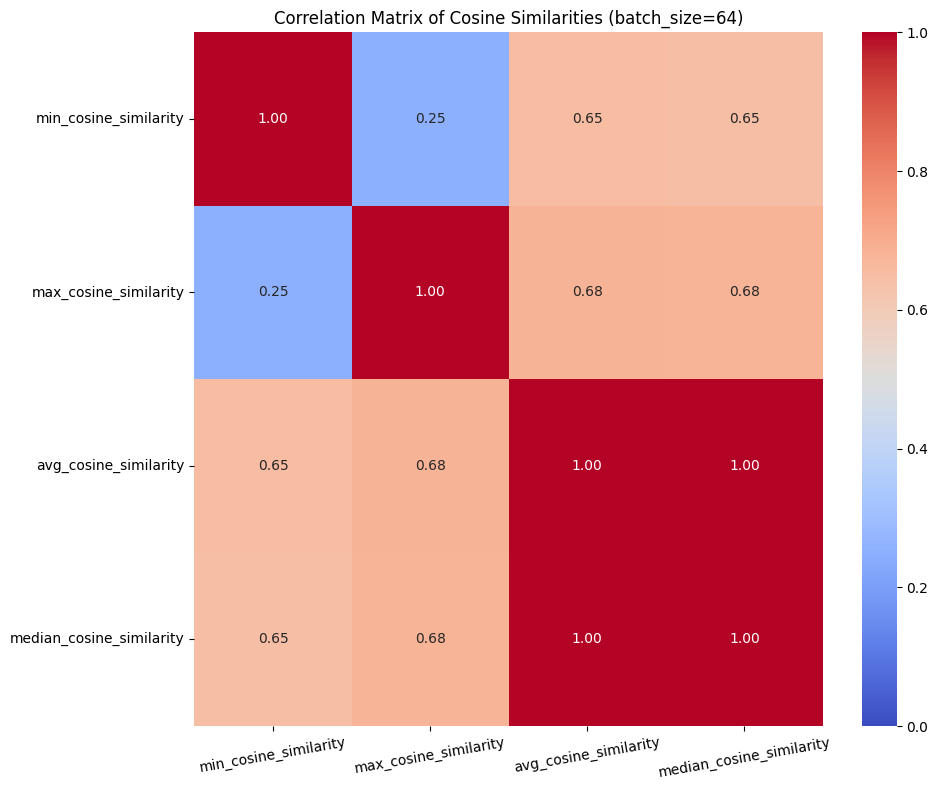

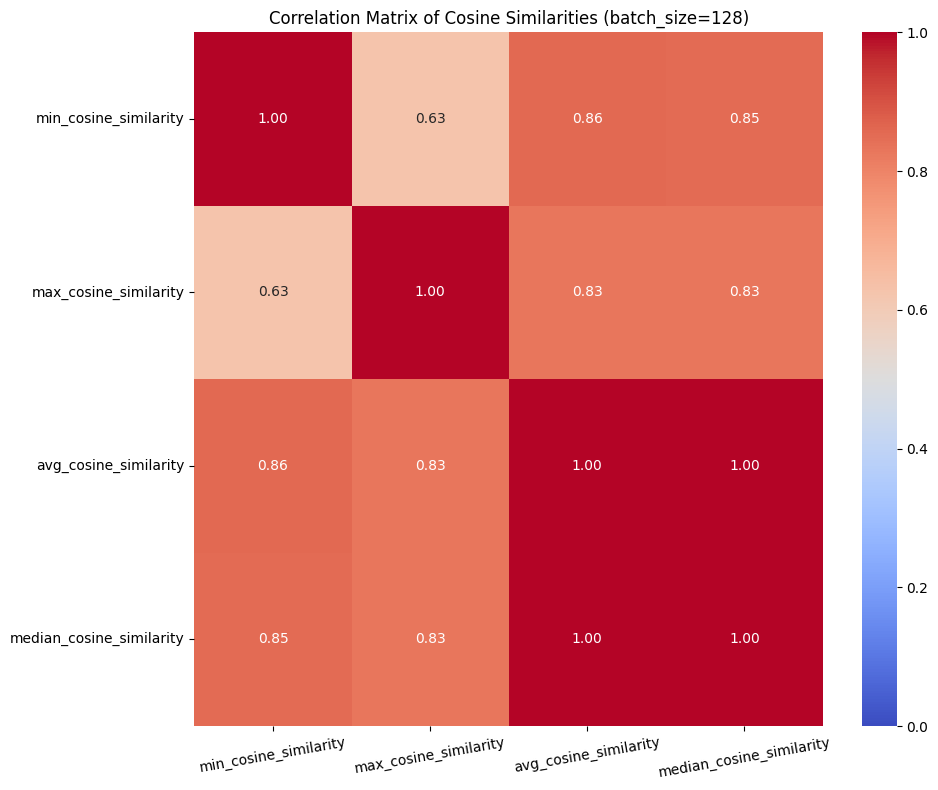

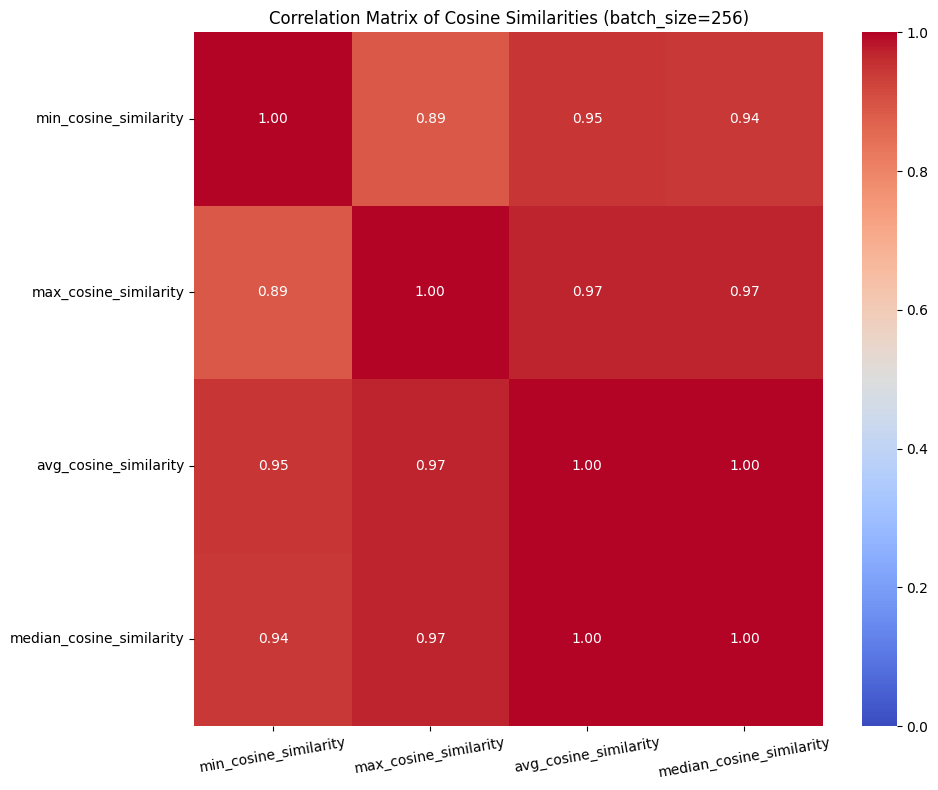

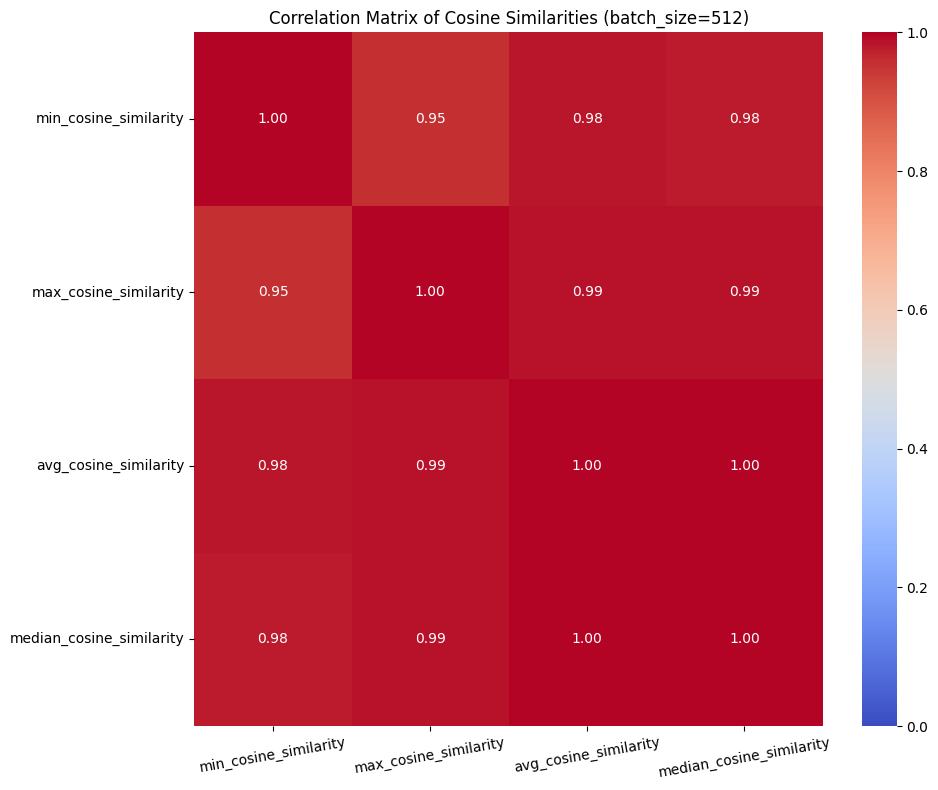

In [68]:
similarity_columns = ['min_cosine_similarity', 'max_cosine_similarity', 'avg_cosine_similarity', 'median_cosine_similarity']

for size in batch_sizes:
    # Calculate the correlation matrix for similarity columns only
    correlation_matrix_similarity = dfs[size][similarity_columns].corr()

    # Plot the heatmap with color scale from 0 to 1
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix_similarity, annot=True, cmap='coolwarm', fmt='.2f', vmin=0, vmax=1)

    # Adding labels and title
    plt.title(f'Correlation Matrix of Cosine Similarities (batch_size={size})')

    # Make xtick labels horizontal
    plt.xticks(rotation=10)

    # Apply tight layout
    plt.tight_layout()

    # Save and show plot
    plt.savefig(f'./figures/gc_correlation_cos_metrics_{size}.pdf')
    plt.show()

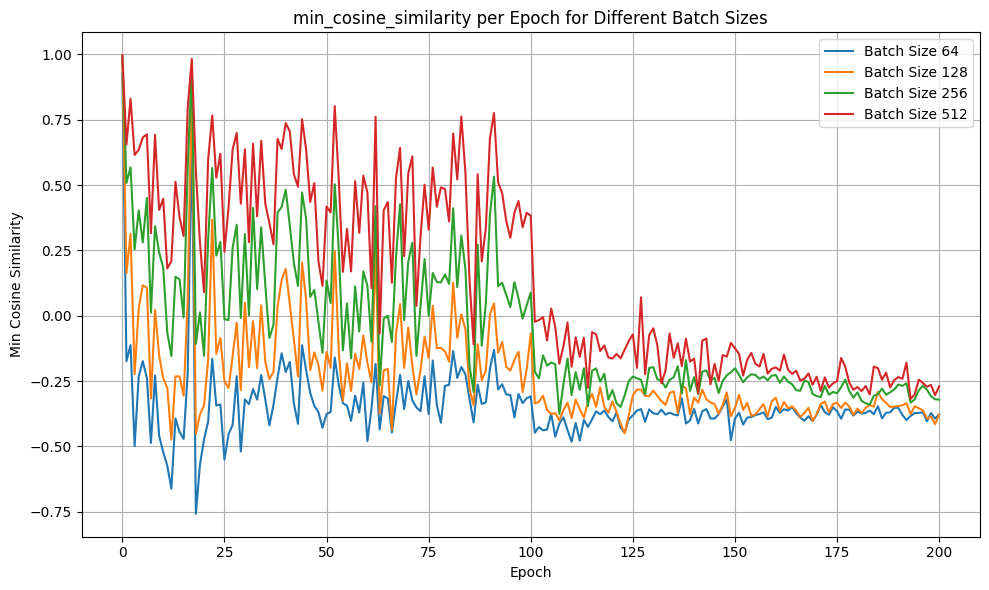

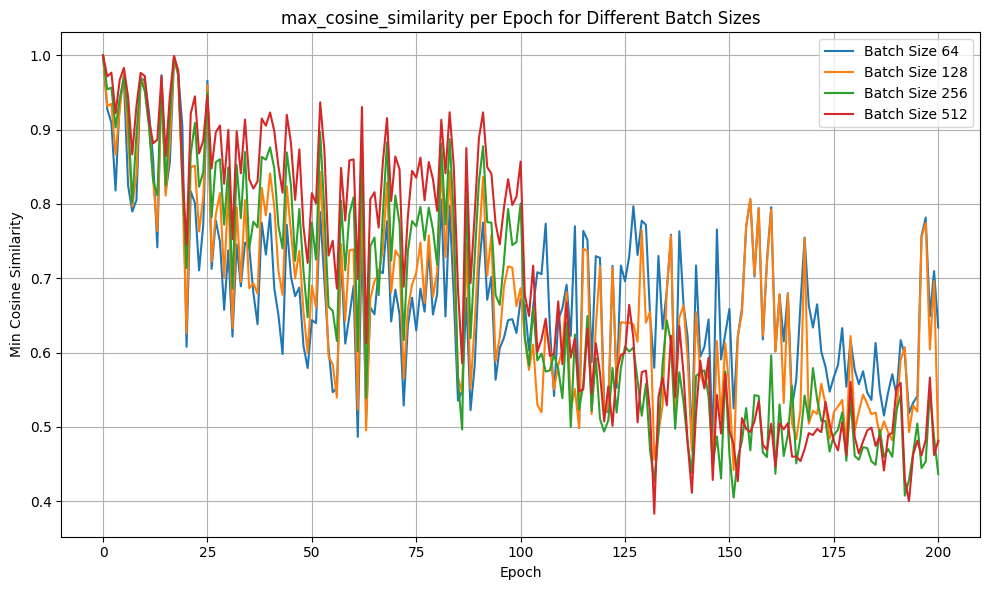

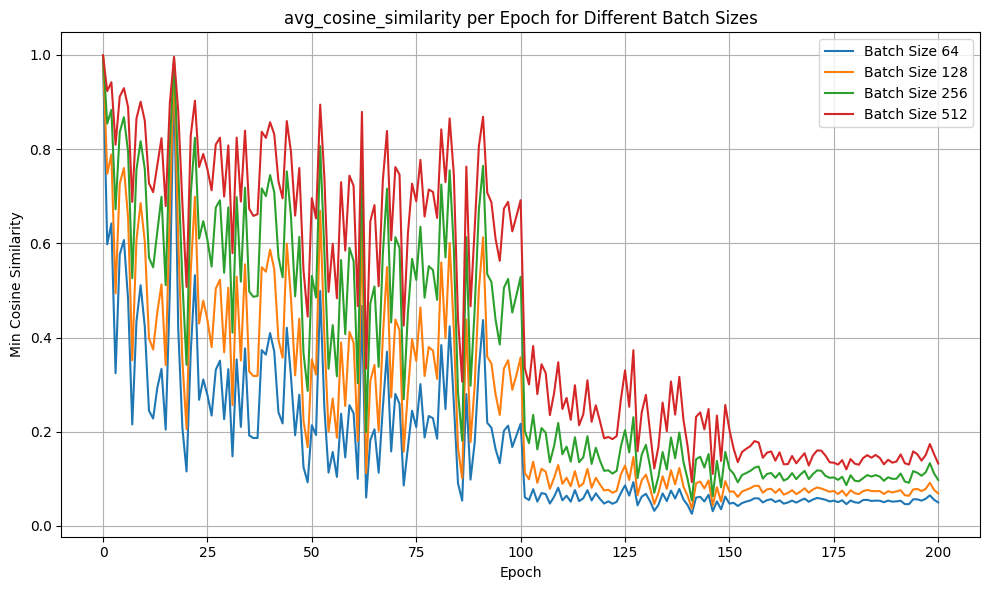

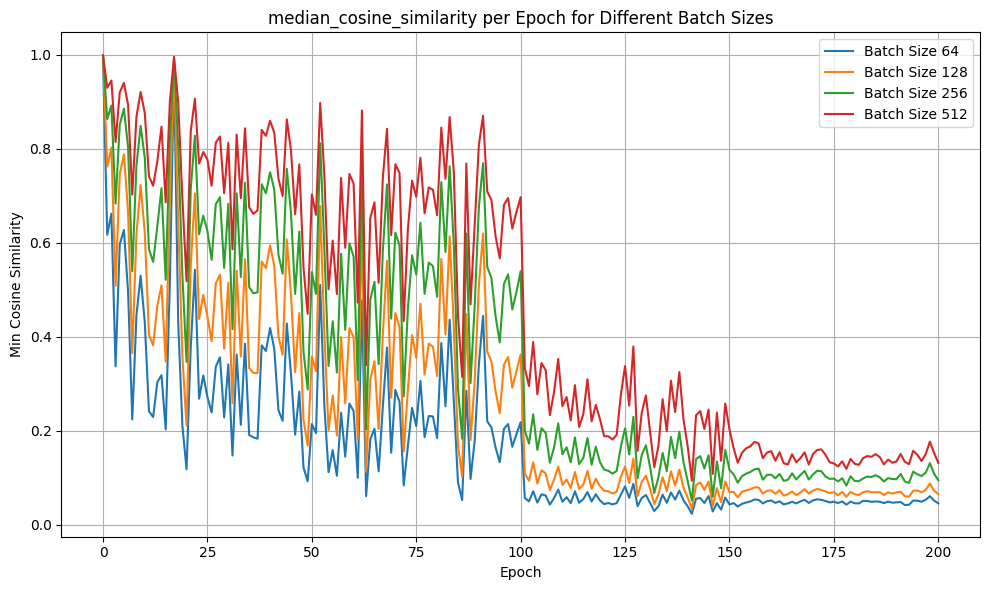

In [69]:

for metric in similarity_columns:
    # Plotting the min cosine similarity for each batch size
    plt.figure(figsize=(10, 6))
    for idx, size in enumerate(batch_sizes):
        plt.plot(dfs[size]['epoch'], dfs[size][metric], label=f'Batch Size {size}')

    # Adding labels and title
    plt.xlabel('Epoch')
    plt.ylabel('Min Cosine Similarity')
    plt.title(f'{metric} per Epoch for Different Batch Sizes')

    # Displaying the legend
    plt.legend()

    # Apply tight layout
    plt.tight_layout()

    # Show plot
    plt.grid(True)
    plt.savefig(f'./figures/gc_{metric}_batch_size.pdf')
    plt.show()

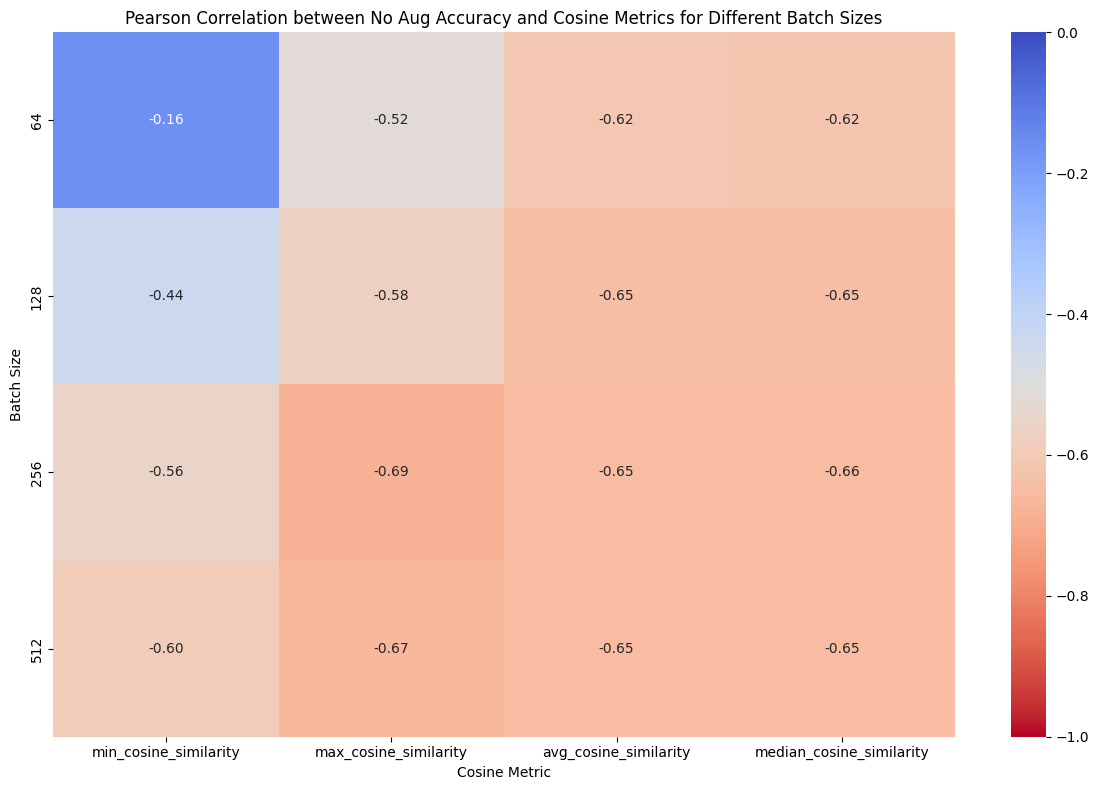

In [70]:
# Read the no augmentation results CSV data into a DataFrame
df_no_aug = pd.read_csv('./ResNet44_CIFAR10_no_aug_results.csv')

# Initialize a dictionary to store the correlations for each batch size
all_correlations = {}

for size in batch_sizes:
    # Calculate the Pearson correlation between no_aug accuracy and each cosine metric
    correlations = {}
    for metric in similarity_columns:
        correlations[metric] = df_no_aug['accuracy'].corr(dfs[size][metric])
    
    # Store the correlations in the dictionary
    all_correlations[size] = correlations

# Convert the dictionary to a DataFrame for easier plotting
correlation_matrix = pd.DataFrame(all_correlations).T

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', fmt='.2f', vmin=-1, vmax=0)

# Adding labels and title
plt.xlabel('Cosine Metric')
plt.ylabel('Batch Size')
plt.title('Pearson Correlation between No Aug Accuracy and Cosine Metrics for Different Batch Sizes')

# Apply tight layout
plt.tight_layout()

# Save and show plot
plt.savefig('./figures/pearson_correlation_no_aug_accuracy_cosine_metrics_heatmap.pdf')
plt.show()
